In [1]:
import numpy as np
import sympy as sp
import ipywidgets
from matplotlib import pyplot as py
%matplotlib inline

sp.init_printing()

In [2]:
u_max = sp.symbols('u_max')
u_star = sp.symbols('u_star')
rho_max = sp.symbols('rho_max')
rho_star = sp.symbols('rho_star')
A, B = sp.symbols('A B')

In [3]:
type(u_max)

sympy.core.symbol.Symbol

In [4]:
u_max

In [5]:
u_max+u_star

In [6]:
#No traffic flux at mAX density
eq1 = sp.Eq(0, rho_max * u_max * (1- A * rho_max- B * rho_max**2))
eq1

In [7]:
#at star
eq2 = sp.Eq(0,  u_max *(1 - 2 * A * rho_star- 3 * B * rho_star**2))

eq2

In [8]:
#equation of ustar for density rho_star
eq3 = sp.Eq(u_star, u_max * (1- A * rho_star- B * rho_star**2))

eq3

In [9]:
eq2 - 3*eq3

In [10]:
eq4 = sp.Eq(eq2.lhs - 3 * eq3.lhs, eq2.rhs - 3 * eq3.rhs)
eq4

In [11]:
#to display simplified function
eq4.simplify()

In [12]:
rho_star_sol =  sp.solve(eq4,rho_star)[0]
rho_star_sol

In [13]:
type(rho_star_sol)

sympy.core.mul.Mul

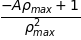

In [14]:
B_sol = sp.solve(eq1,B)[0]
B_sol

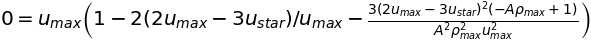

In [15]:
eq5 = eq2.subs([(rho_star, rho_star_sol), (B,B_sol)])

eq5

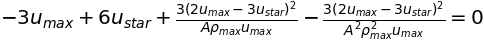

In [16]:
eq5.simplify()

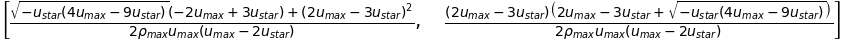

In [17]:
A_sol = sp.solve(eq5, A)

A_sol

In [18]:
A_val_0 = A_sol[0].evalf(subs={rho_max:10.0,u_max: 1.0, u_star: 0.7})
A_val_0

In [19]:
A_val_1 = A_sol[1].evalf(subs={rho_max:10.0,u_max: 1.0, u_star: 0.7})
A_val_1

In [20]:
A_val = max(A_val_0,A_val_1)
A_val

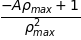

In [21]:
B_sol

In [22]:
B_val = B_sol.evalf(subs={rho_max: 10.0, A: A_val})

B_val

In [23]:
def cubic_flux(rho,u_max, A,B):
    F = rho * u_max * (1 - A * rho - B * rho**2)
    return F

In [25]:
rho_max = 10.0
u_max = 1.0

L=4.0
nx = 81
dx = L/(nx-1)

x = np.linspace(0.0,L , num=nx)

In [28]:
rho0 = np.zeros_like(x)

mask = x<2
rho0[mask] = rho_max * x[mask] / 2 

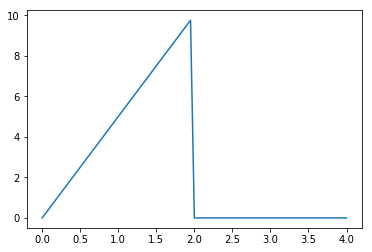

In [29]:
py.plot(x, rho0)

In [37]:
def ftbs(rho0, u_max, dx, nt, nx, sigma=1):
    A = A_val
    B = B_val
    dt = sigma * dx /u_max
    rho_hist = [rho0.copy()]
    rho1 = rho0.copy()
    for n in range (nt):
        rho2 = rho1.copy()
        F    = cubic_flux(rho2,u_max, A,B)
        for i in range (1, nx-1):
            rho1[i] = rho2[i] - (F[i] - F[i-1])*(dt/dx)
    
        rho_hist.append(rho1.copy())
    
    return rho_hist      
        

In [39]:
ftbs(rho0, 1.0, dx, 30, nx, 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


[array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
        5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
        8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]),
 array([0.00000000e+00, 1.04659087e-03, 2.53673456e-01, 5.07100845e-01,
        7.61328758e-01, 1.01635720e+00, 1.27218616e+00, 1.52881565e+00,
        1.78624566e+00, 2.04447619e+00, 2.30350725e+00, 2.56333884e+00,
        2.82397095e+00, 3.08540358e+00, 3.34763674e+00, 3.61067042e+00,
        3.87450463e+00, 4.13913936e+00, 4.40457462e+00, 4.67081040e+00,
        4.93784671e+00, 5.20568354e+00, 5.47432089e+00, 5.74375877e+00,
        6.013997

In [52]:
def mac_cormack(rho0, u_max, dx, nt, nx, sigma=1):
    A = A_val
    B = B_val
    dt = sigma * dx /u_max
    rho_hist = [rho0.copy()]
    rho1 = rho0.copy()
    for n in range (nt):
        rho2 = rho1.copy()
        
        
        F    = cubic_flux(rho2,u_max, A,B)
        F_star = F.copy()
        for i in range (1, nx-1):
            
            rho_star = rho2[i] - (dt/dx)*(F[i+1] - F[i-1])
            
            F_star[i] = cubic_flux(rho_star,u_max, A,B)
            
            rho1[i] = 0.5*(rho2[i]+rho_star - 
                           (dt/dx)*(F_star[i]-F_star[i-1]))
        
        rho_hist.append(rho1.copy())
    
    return rho_hist  

In [53]:
mac_cormack(rho0, 1.0, dx, 30, nx, 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


[array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
        5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
        8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]),
 array([ 0.        ,  0.1253765 ,  0.12698437,  0.38099526,  0.63626737,
         0.89281731,  1.15066195,  1.40981838,  1.670304  ,  1.93213643,
         2.19533357,  2.45991358,  2.72589488,  2.99329617,  3.2621364 ,
         3.53243481,  3.80421088,  4.0774844 ,  4.35227541,  4.62860423,
         4.90649146,  5.18595798,  5.46702495,  5.74971381,  6.03404628,
         6.32004438,  6.60773041,  6.89712694,  7.18825687,  7.48114334,
         7